In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

## Generating sythetic data

In [20]:
np.random.seed(41)
x = np.arange(start=1, stop=10.5, step=0.5)
fx = x + np.random.uniform(-1, 1, size=x.shape)

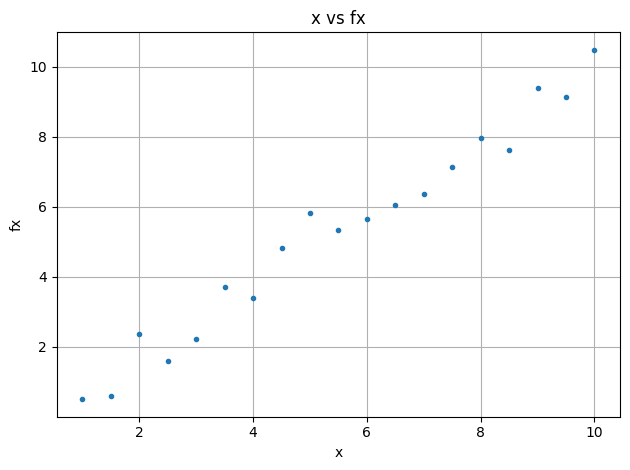

In [21]:
plt.plot(x, fx, '.')
plt.xlabel("x")
plt.ylabel("fx")
plt.title("x vs fx")
plt.tight_layout()
plt.grid(True);

## How can we fit a line to this data? Let's use imports.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(fit_intercept=True)
model_fit = model.fit(x,fx)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Why did I get an error... SHAPES!

In [24]:
x.shape, fx.shape

((19,), (19,))

We need to add an extra "dimension" in order for this to work!

In [25]:
X = x.reshape(-1,1)
y = fx.reshape(-1,1)

In [26]:
X.shape, y.shape

((19, 1), (19, 1))

Now let's try again...

In [27]:
model = LinearRegression(fit_intercept=True)
model_fit = model.fit(X,y)

Seems like that worked!

In [28]:
model_fit.coef_[0][0], model_fit.intercept_[0]

(1.0439154687617718, -0.46599969931002505)

In [29]:
y_pred = lambda x: model_fit.coef_[0][0]*x + model_fit.intercept_[0]

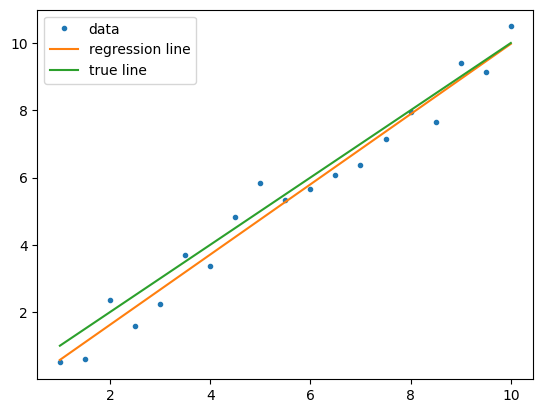

In [30]:
plt.plot(x, fx, '.', label="data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, x, label="true line")
plt.legend();

### Notice how we previously got a shape error- shapes are annoying, but to see why we had to "add a dimension," it's helpful to code up a linear regression module yourself!

In [31]:
class LR():
    def __init__(self) -> None:
        self.params = None
    
    def fit(self, X, y):
        r, _ = X.shape # This is why we needed to add an extra dimension!
        X = np.hstack([np.ones((r, 1)), X]) # Explain this!
        self.params = np.linalg.pinv(X.T @ X) @ X.T @ y

        return self
    
    def predict(self, X):
        r, _ = X.shape
        X = np.hstack([np.ones((r, 1)), X])

        return X @ self.params
    
    def score(self, X, y):
        y_pred = self.predict(X)
        SYY = np.sum( (y - np.mean(y))**2 )
        RSS = np.sum( (y - y_pred)**2 )

        return 1 - RSS/SYY

In [57]:
model2 = LR()
model2_fit = model2.fit(X, y)

In [33]:
model2_fit.params

array([[-0.4659997 ],
       [ 1.04391547]])

In [34]:
model2_fit.predict(np.array([[1]]))

array([[0.57791577]])

In [35]:
model2_fit.score(X,y)

0.970218389673954

In [36]:
SYY = np.sum( (y - np.mean(y))**2 )
SYY

160.05749967881115

In [37]:
RSS = np.sum( (y - model_fit.predict(X))**2 )
RSS

4.766770085195577

In [38]:
model_fit.predict(X)[0:5], y[0:5]

(array([[0.57791577],
        [1.0998735 ],
        [1.62183124],
        [2.14378897],
        [2.66574671]]),
 array([[0.50184725],
        [0.59219164],
        [2.35363248],
        [1.58693897],
        [2.23284741]]))

ALWAYS. MAKE. SURE. YOUR. SHAPES. ARE. CORRECT.

## What more is there to regression?

In [39]:
from sklearn.linear_model import Ridge

In [40]:
model3 = Ridge(alpha=1)
model3_fit = model3.fit(X, y)

In [41]:
model3_fit.coef_, model3_fit.intercept_

(array([[1.0366408]]), array([-0.425989]))

In [42]:
model_fit.coef_, model_fit.intercept_

(array([[1.04391547]]), array([-0.4659997]))

## We did somehting here...

In [43]:
y_pred_ridge = lambda x: model3_fit.coef_[0][0]*x + model3_fit.intercept_[0]

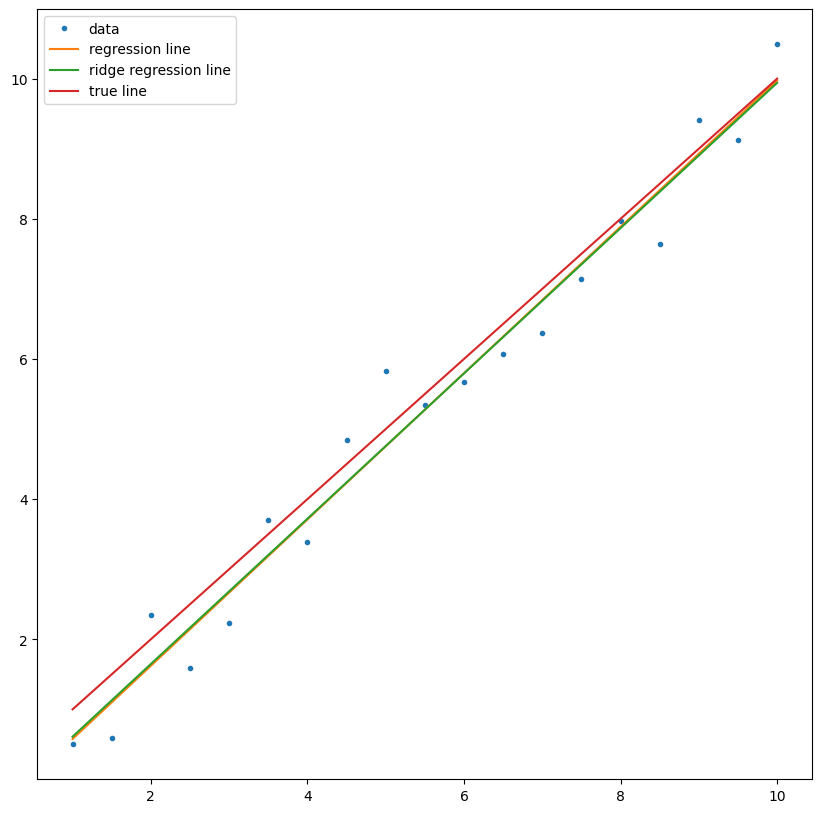

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(x, fx, '.', label="data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, y_pred_ridge(x), label="ridge regression line")
plt.plot(x, x, label="true line")
plt.legend();

## Can you sort of see the difference?

Let me coke this up...

In [45]:
model4 = Ridge(alpha=50)
model4_fit = model4.fit(X, y)

In [46]:
model4_fit.coef_, model4_fit.intercept_

(array([[0.77276859]]), array([1.02530811]))

In [47]:
y_pred_coked_ridge = lambda x: model4_fit.coef_[0][0]*x + model4_fit.intercept_

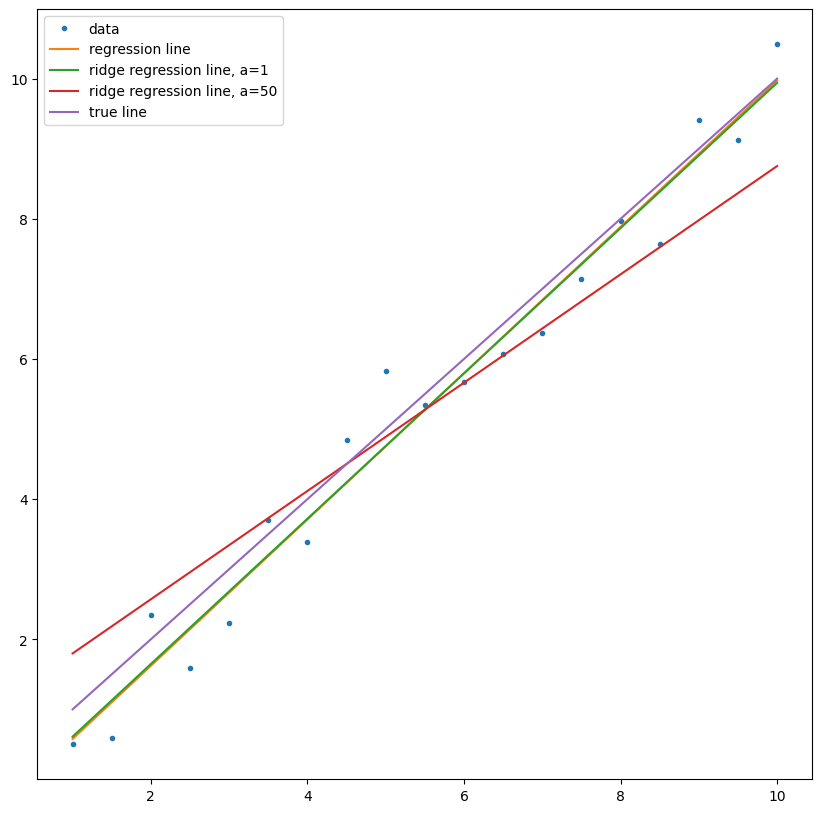

In [48]:
plt.figure(figsize=(10, 10))
plt.plot(x, fx, '.', label="data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, y_pred_ridge(x), label="ridge regression line, a=1")
plt.plot(x, y_pred_coked_ridge(x), label="ridge regression line, a=50")
plt.plot(x, x, label="true line")
plt.legend();

In [49]:
class Animal():
    def __init__(self, num_legs, name) -> None:
        self.num_legs = num_legs
        self.name = name

    def roar(self):
        if self.name == "jerry":
            print("roar")
        else:
            print("no")

    def return_self(self):
        return self

In [50]:
lion = Animal(4, "jerry")

In [51]:
lion.return_self().roar()

roar


In [52]:
lion.name

'jerry'

In [53]:
lion.num_legs

4

In [54]:
lion.roar()

roar


In [4]:
import pandas as pd 
import numpy as np

In [7]:
d = {"Messi": 1, "Ronaldo": 2, "IShowSpeed": 3}
d

{'Messi': 1, 'Ronaldo': 2, 'IShowSpeed': 3}

In [8]:
d["Messi"]

1

In [10]:
df = pd.DataFrame({"A": [1,2,3], "B": [4,2,3]})
df

,A,B
0,1,4
1,2,2
2,3,3


In [30]:
df["C"] = df["A"] + df["B"]

In [35]:
df

,A,B,C
0,1,4,5
1,2,2,4
2,3,3,6


In [49]:
df.[:, "D"]

KeyError: 'D'

In [53]:
df.loc[:, "E"] = 10

In [55]:
df.loc[1:2, "F"] = 10

In [63]:
x = df.dropna()

In [64]:
x

,A,B,C,D,E,F
1,2,2,4,2,10,10.0
2,2,3,6,2,10,10.0


In [71]:
finance.loc[]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...
2024-10-29,233.100006,234.330002,232.320007,233.669998,233.669998,35417200
2024-10-30,232.610001,233.470001,229.550003,230.100006,230.100006,47070900
2024-10-31,229.339996,229.830002,225.369995,225.910004,225.910004,64370100


In [47]:
df.iloc[0]["C"]

5

In [ ]:
df.loc[0]

In [13]:
import yfinance as yf

In [81]:
d = yf.download("AAPL")
d.index

[*********************100%%**********************]  1 of 1 completed


DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04'],
              dtype='datetime64[ns]', name='Date', length=11066, freq=None)

In [78]:
from datetime import datetime
from datetime import timedelta

In [79]:
start = datetime(year=1990, month=1, day=20)
time_gap = timedelta(days=1000)
end = start + time_gap

In [87]:
d.index > start
d.index < end

array([ True,  True,  True, ..., False, False, False])

In [88]:
d.loc[ (d.index > start) & (d.index < end) , :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-22,0.303571,0.308036,0.296875,0.296875,0.234239,145611200
1990-01-23,0.301339,0.305804,0.294643,0.301339,0.237761,140873600
1990-01-24,0.290179,0.305804,0.287946,0.303571,0.239522,169792000
1990-01-25,0.305804,0.310268,0.303571,0.304688,0.240404,111540800
1990-01-26,0.303571,0.303571,0.287946,0.292411,0.230717,181249600
...,...,...,...,...,...,...
1992-10-09,0.388393,0.392857,0.383929,0.387277,0.314313,58744000
1992-10-12,0.386161,0.395089,0.386161,0.392857,0.318842,71635200
1992-10-13,0.399554,0.410714,0.392857,0.405134,0.328806,147179200


In [73]:
from datetime import datetime

In [74]:
(datetime(year=2004, month=3, day=2) - datetime(year=2003, month=1, day=15)).days

412

In [75]:
df.index

Index([1, 2], dtype='int64')

In [89]:
df

,A,B,C,D,E,F
1,2,2,4,2,10,10.0
2,2,3,6,2,10,10.0


In [90]:
df.loc[ [True, False], :]

,A,B,C,D,E,F
1,2,2,4,2,10,10.0
